<a href="https://colab.research.google.com/github/adefauziah/adenf/blob/master/Proyek_Akhir_Ade_Nurul_Fauziah_0182180150_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-29 14:52:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.73MB/s    in 53s     

2021-06-29 14:53:44 (5.79 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# extract zip file
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [ ]:
import os
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'scissors', 'rps-cv-images', 'paper', 'rock']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax') #jumlah output
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 67s - loss: 0.9716 - accuracy: 0.5013 - val_loss: 0.6289 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 30s - loss: 0.4520 - accuracy: 0.8104 - val_loss: 0.3433 - val_accuracy: 0.8875
Epoch 3/20
25/25 - 31s - loss: 0.3129 - accuracy: 0.8888 - val_loss: 0.3134 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 30s - loss: 0.2050 - accuracy: 0.9305 - val_loss: 0.1145 - val_accuracy: 0.9750

Akurasi telah mencapai >92%!


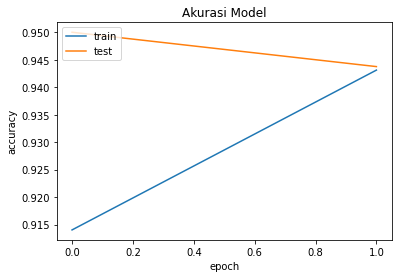

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

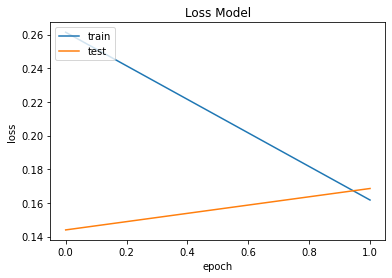

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp2uchseej/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
scissors


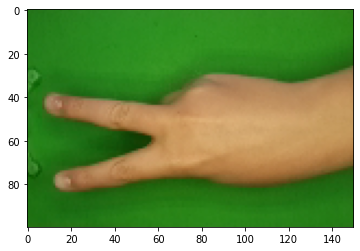

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')